In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

BATCH_SIZE = 256
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [13]:
# Q1
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


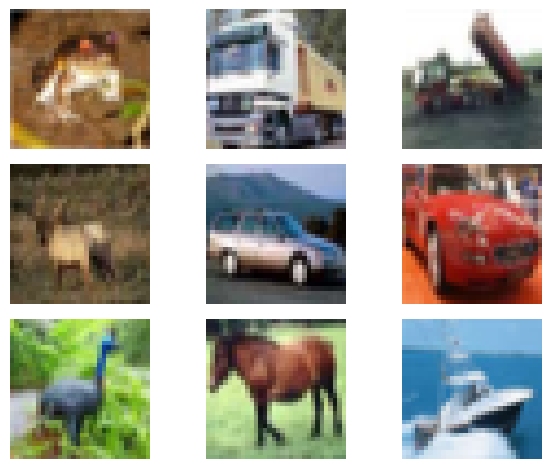

In [14]:
# Q2
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
x_train_ds = tf.data.Dataset.from_tensor_slices(x_train)
y_train_ds = tf.data.Dataset.from_tensor_slices(y_train)
train_ds = tf.data.Dataset.zip((x_train_ds, y_train_ds))

In [16]:
def preprocess_fn(image, label):
    image = tf.cast(image, dtype=tf.float32)
    image = tf.image.per_image_standardization(image)
    return(image, label)

In [17]:
train_ds = train_ds.map(preprocess_fn)
train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).repeat()

In [18]:
# Q3
x_test_ds = tf.data.Dataset.from_tensor_slices(x_test)
y_test_ds = tf.data.Dataset.from_tensor_slices(y_test)
test_ds = tf.data.Dataset.zip((x_test_ds, y_test_ds))

test_ds = test_ds.map(preprocess_fn)
test_ds = test_ds.batch(BATCH_SIZE)

In [ ]:
# Q4
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
    tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn, 
              metrics=['sparse_categorical_accuracy'])

BATCH_SIZE = 256
model.fit(train_ds, validation_data=test_ds,
          steps_per_epoch=50000//BATCH_SIZE, epochs=5,
          validation_steps=10000//BATCH_SIZE)

# ACCURACY OF 73.89% <----------------------------------------------------------------------------------------------

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 1.4711 - sparse_categorical_accuracy: 0.4740 - val_loss: 1.4178 - val_sparse_categorical_accuracy: 0.4919
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 1.0894 - sparse_categorical_accuracy: 0.6164 - val_loss: 1.1121 - val_sparse_categorical_accuracy: 0.6047
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.9276 - sparse_categorical_accuracy: 0.6747 - val_loss: 1.0082 - val_sparse_categorical_accuracy: 0.6406
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.8228 - sparse_categorical_accuracy: 0.7146 - val_loss: 0.9348 - val_sparse_categorical_accuracy: 0.6764
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7485 - sparse_categorical_accuracy: 0.7389 - val_loss: 0.9645 - val_sparse_categorical_accuracy: 0.6717


In [20]:
# Q5
def preprocess_new_fn(image, label):
    image = tf.cast(image, dtype=tf.float32)

    image = tf.image.random_flip_left_right(image) # random flip
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2) # contrast perturbation

    image = tf.image.per_image_standardization(image)
    return(image, label)

train_ds = tf.data.Dataset.zip((x_train_ds, y_train_ds))
train_ds = train_ds.map(preprocess_new_fn)
train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).repeat()

In [ ]:
# Q6
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn, 
              metrics=['sparse_categorical_accuracy'])

BATCH_SIZE = 256
model.fit(train_ds, validation_data=test_ds,
          steps_per_epoch=50000//BATCH_SIZE, epochs=5,
          validation_steps=10000//BATCH_SIZE)

# ACCURACY OF 78.47% <----------------------------------------------------------------------------------------------

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.7847 - sparse_categorical_accuracy: 0.7273 - val_loss: 0.9191 - val_sparse_categorical_accuracy: 0.6872
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7262 - sparse_categorical_accuracy: 0.7469 - val_loss: 0.8466 - val_sparse_categorical_accuracy: 0.7073
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.6893 - sparse_categorical_accuracy: 0.7603 - val_loss: 0.8275 - val_sparse_categorical_accuracy: 0.7186
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6509 - sparse_categorical_accuracy: 0.7728 - val_loss: 0.8415 - val_sparse_categorical_accuracy: 0.7140
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6211 - sparse_categorical_accuracy: 0.7847 - val_loss: 0.7998 - val_sparse_categorical_accuracy: 0.7283


In [ ]:
# Q7
x_sub = x_test[:512]
y_sub = y_test[:512]

x_sub_ds = tf.data.Dataset.from_tensor_slices(x_sub)
y_sub_ds = tf.data.Dataset.from_tensor_slices(y_sub)
sub_ds = tf.data.Dataset.zip((x_sub_ds, y_sub_ds))

sub_ds = sub_ds.map(preprocess_fn).batch(512)

pred_logits = model.predict(sub_ds)

y_pred = []
for predictions in pred_logits:
    y_pred.append(int(np.argmax(predictions)))

y_true = y_sub.flatten()

count = 0
for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
        count += 1

sub_acc = count / 512.0
print(f"Accuracy: {sub_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
0.732421875


In [50]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_true, y_pred)
print(con_mat)

[[36  1  3  1  3  1  2  0  9  1]
 [ 1 34  0  1  0  0  0  0  3  2]
 [ 3  0 32  9  2  0  4  1  0  0]
 [ 1  1  3 31  3  4  3  2  0  1]
 [ 0  0  4  2 30  3  1  3  0  1]
 [ 0  0  4 10  2 29  1  3  0  1]
 [ 0  0  1  4  3  0 48  0  0  0]
 [ 0  0  2  5  0  1  0 40  0  0]
 [ 3  2  0  1  1  0  2  0 46  2]
 [ 2  3  0  0  0  0  0  1  4 49]]
